# Описание проекта

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

# Описание тарифов
**Тариф «Смарт»**

Ежемесячная плата: 550 рублей

Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика

Стоимость услуг сверх тарифного пакета:

- минута разговора: 3 рубля

- сообщение: 3 рубля

- 1 Гб интернет-трафика: 200 рублей

**Тариф «Ультра»**

Ежемесячная плата: 1950 рублей

Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика

Стоимость услуг сверх тарифного пакета:

- минута разговора: 1 рубль

- сообщение: 1 рубль

- 1 Гб интернет-трафика: 150 рублей

# Описание данных

**Таблица users (информация о пользователях):**

- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tariff — название тарифного плана

**Таблица calls (информация о звонках):**

- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

**Таблица messages (информация о сообщениях):**

- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

**Таблица internet (информация об интернет-сессиях):**

- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

**Таблица tariffs (информация о тарифах):**

- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

## Откроем файл с данными и изучим общую информацию

In [2]:
#Импортируем все необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [3]:
#Открываем каждый файл для изучения
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

In [4]:
#Посмотрим первые 10 строк из файла "calls"
calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [5]:
#Посмотрим значения в файле "calls"
calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


In [6]:
#Посмотрим первые 10 строк из файла "internet"
internet.head(10)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


In [7]:
#Здесь есть дополнительный столбец с индексами, поскольку он нам не нужен, его можно убрать
internet = pd.read_csv('/datasets/internet.csv', index_col=0)

In [8]:
#Опять посмотрим первые 10 строк из файла "internet" после изменений
internet.head(10)

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
5,1000_5,399.97,2018-10-02,1000
6,1000_6,540.08,2018-09-07,1000
7,1000_7,415.70,2018-07-11,1000
8,1000_8,505.40,2018-10-08,1000
9,1000_9,345.54,2018-09-03,1000


In [9]:
#Посмотрим значения в файле "internet"
internet.describe()

,mb_used,user_id
count,149396.000000,149396.000000
mean,370.192426,1252.099842
std,278.300951,144.050823
min,0.000000,1000.000000
25%,138.187500,1130.000000
50%,348.015000,1251.000000
75%,559.552500,1380.000000
max,1724.830000,1499.000000


In [10]:
#Посмотрим первые 10 строк из файла "messages"
messages.head(10)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [11]:
#Посмотрим значения в файле "messages"
messages.describe()

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


In [12]:
#Посмотрим первые 10 строк из файла "tariffs"
tariffs.head(10)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [13]:
#Посмотрим значения в файле "tariffs"
tariffs.describe()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


In [14]:
#Посмотрим первые 10 строк из файла "users"
users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [15]:
#Посмотрим значения в файле "users"
users.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


In [16]:
#Посмотрим общую информацию во всех файлах сразу
for data in [calls, internet, messages, tariffs, users]: print(data.info(), end='\n\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0

### Вывод

Для анализа у нас предоставлено 500 пользователей компании "Мегалайн". В принципе, можно сказать, что данные в большинстве случаев в порядке. Пропуски есть только в файле "users" в столбце 'churn_date' (который можно оставить без заполнения, он нам не важен для анализа), в остальных случаях можно поменять тип данных там, где есть даты, а также округлить значения с мегабайтами и временем разговора в большую сторону.

## Подготовьте данные

In [17]:
#Подробнее изучим данные для каждого столбца из файла "calls"
calls['id'].value_counts()

1263_385     1
1324_750     1
1363_246     1
1490_195     1
1263_498     1
            ..
1200_376     1
1412_325     1
1196_1140    1
1363_927     1
1032_58      1
Name: id, Length: 202607, dtype: int64

In [18]:
calls['call_date'].value_counts()

2018-12-31    1435
2018-12-29    1202
2018-12-30    1192
2018-12-22    1158
2018-12-26    1149
              ... 
2018-01-05      20
2018-01-07      18
2018-01-02       9
2018-01-03       7
2018-01-01       5
Name: call_date, Length: 365, dtype: int64

In [19]:
calls['duration'].value_counts()

0.00     39613
4.49       142
5.50       142
6.15       141
6.38       141
         ...  
27.02        1
26.19        1
25.34        1
27.13        1
24.28        1
Name: duration, Length: 2871, dtype: int64

In [20]:
calls['user_id'].value_counts()

1377    1760
1168    1692
1375    1560
1453    1440
1196    1240
        ... 
1397      33
1442      28
1373      24
1016      20
1257      14
Name: user_id, Length: 492, dtype: int64

In [21]:
#Проверим, есть ли дубликаты в файле "calls"
calls.duplicated().sum()

0

In [22]:
#Поменяем тип данных в столбце "call_date"
calls['call_date'] = pd.to_datetime(calls['call_date'])

In [23]:
#Проверим изменения
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


In [24]:
#Подробнее изучим данные для каждого столбца из файла "internet"
internet['id'].value_counts()

1263_385    1
1424_49     1
1449_189    1
1062_6      1
1185_480    1
           ..
1490_169    1
1263_394    1
1363_40     1
1381_335    1
1014_439    1
Name: id, Length: 149396, dtype: int64

In [25]:
internet['mb_used'].value_counts()

0.00      19598
197.56        9
447.30        9
335.91        9
108.95        8
          ...  
72.49         1
846.22        1
429.17        1
899.03        1
483.87        1
Name: mb_used, Length: 70003, dtype: int64

In [26]:
internet['session_date'].value_counts()

2018-12-31    1057
2018-12-30     903
2018-12-25     859
2018-12-26     844
2018-12-22     834
              ... 
2018-01-05      14
2018-01-04       9
2018-01-03       6
2018-01-01       3
2018-01-02       3
Name: session_date, Length: 365, dtype: int64

In [27]:
internet['user_id'].value_counts()

1496    834
1227    812
1204    789
1240    764
1251    759
       ... 
1151     35
1467     27
1343     26
1192     22
1399      8
Name: user_id, Length: 497, dtype: int64

In [28]:
#Проверим, есть ли дубликаты в файле "internet"
internet.duplicated().sum()

0

In [29]:
#Поменяем тип данных в столбце "session_date"
internet['session_date'] = pd.to_datetime(internet['session_date'])

In [30]:
#Проверим изменения
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 5.7+ MB


In [31]:
#Подробнее изучим данные для каждого столбца из файла "messages"
messages['id'].value_counts()

1096_452    1
1424_49     1
1447_150    1
1028_473    1
1404_32     1
           ..
1113_164    1
1221_196    1
1203_83     1
1481_74     1
1032_58     1
Name: id, Length: 123036, dtype: int64

In [32]:
messages['message_date'].value_counts()

2018-12-31    859
2018-12-30    765
2018-12-21    712
2018-12-29    702
2018-12-26    699
             ... 
2018-01-11     12
2018-01-02     10
2018-01-04     10
2018-01-05     10
2018-01-03      4
Name: message_date, Length: 364, dtype: int64

In [33]:
messages['user_id'].value_counts()

1277    1463
1089    1408
1231    1384
1385    1380
1356    1224
        ... 
1389       6
1279       5
1074       3
1159       2
1141       1
Name: user_id, Length: 426, dtype: int64

In [34]:
#Проверим, есть ли дубликаты в файле "messages"
messages.duplicated().sum()

0

In [35]:
#Поменяем тип данных в столбце "message_date"
messages['message_date'] = pd.to_datetime(messages['message_date'])

In [36]:
#Проверим изменения
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


In [37]:
#Для файла "tariffs" нет смысла проверять все данные, поскольку там всего лишь хранится информация о 2 тарифах
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [38]:
#Подробнее изучим данные для каждого столбца из файла "users"
users['user_id'].value_counts()

1023    1
1194    1
1181    1
1182    1
1183    1
       ..
1362    1
1363    1
1364    1
1365    1
1024    1
Name: user_id, Length: 500, dtype: int64

In [39]:
users['age'].value_counts()

53    14
42    14
63    13
71    13
64    13
73    12
21    12
40    12
39    11
47    11
29    11
26    11
37    11
41    10
36    10
58    10
45    10
70    10
52    10
51     9
27     9
48     9
50     9
28     9
30     9
24     9
20     9
19     9
56     9
23     9
68     9
66     9
65     9
69     8
62     8
60     8
44     8
55     8
25     7
43     7
67     7
35     7
74     7
32     7
31     7
46     7
75     6
54     6
59     6
18     6
33     5
34     5
38     5
22     5
72     5
49     4
57     4
61     3
Name: age, dtype: int64

In [40]:
users['churn_date'].value_counts()

2018-12-21    2
2018-12-03    2
2018-10-14    2
2018-12-09    2
2018-10-03    2
2018-08-31    1
2018-12-18    1
2018-09-27    1
2018-10-25    1
2018-10-05    1
2018-10-28    1
2018-10-27    1
2018-12-25    1
2018-11-13    1
2018-12-11    1
2018-11-26    1
2018-11-16    1
2018-12-20    1
2018-10-04    1
2018-08-17    1
2018-12-24    1
2018-12-26    1
2018-09-02    1
2018-11-27    1
2018-11-22    1
2018-12-23    1
2018-12-30    1
2018-11-21    1
2018-09-26    1
2018-11-07    1
2018-12-16    1
2018-11-30    1
2018-12-14    1
Name: churn_date, dtype: int64

In [41]:
users['city'].value_counts()

Москва             99
Санкт-Петербург    39
Новосибирск        16
Казань             14
Омск               14
                   ..
Химки               1
Архангельск         1
Подольск            1
Нижневартовск       1
Иваново             1
Name: city, Length: 76, dtype: int64

In [42]:
users['first_name'].value_counts()

Радим       6
Леонид      5
Пётр        5
Габриель    4
Андрей      4
           ..
Майя        1
Милена      1
Геодар      1
Рем         1
Людмила     1
Name: first_name, Length: 246, dtype: int64

In [43]:
users['last_name'].value_counts()

Андреенко     5
Аничкина      3
Алексеенко    3
Озерова       3
Булгаков      3
             ..
Абрамычева    1
Алёшкова      1
Карасев       1
Сазонов       1
Шарапов       1
Name: last_name, Length: 419, dtype: int64

In [44]:
users['reg_date'].value_counts()

2018-05-28    8
2018-10-05    5
2018-11-16    5
2018-04-03    5
2018-07-16    5
             ..
2018-05-16    1
2018-05-22    1
2018-12-01    1
2018-08-18    1
2018-04-04    1
Name: reg_date, Length: 270, dtype: int64

In [45]:
users['tariff'].value_counts()

smart    351
ultra    149
Name: tariff, dtype: int64

In [46]:
#Проверим, есть ли дубликаты в файле "users"
users.duplicated().sum()

0

In [47]:
#Поменяем тип данных в столбце "reg_date"
users['reg_date'] = pd.to_datetime(users['reg_date'])

In [48]:
#Поменяем тип данных в столбце "churn_date"
users['churn_date'] = pd.to_datetime(users['churn_date'])

In [49]:
#Посмотрим пропуски в столбце "churn_date"
users[users['churn_date'].isna()]

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
494,1494,62,NaT,Омск,Ренат,Андропов,2018-08-17,smart
495,1495,65,NaT,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaT,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaT,Челябинск,Каролина,Агеева,2018-10-09,smart


In [50]:
#Проверим изменения
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


### Вывод

Как было сказано в выводе 1.1, с данными по большей части всё в порядке. Был проведён более детальный анализ, а именно: осмотр каждого столбца в файле, проверка на наличие дубликатов (не было обнаружено), изменение типа данных в столбцах с датами. В файле "users" в столбце "churn_date" есть пропуски, но их можно ничем не заполнять, а оставить как есть, поскольку они нам для дальнейшего анализа не важны (скорее всего, этот столбец означает дату договора, если значение отстутствует, то договор по-прежнему действует, а если есть дата, то это дата окончания договора, в принципе можно было бы создать отдельный столбец с булевыми значениями, но оставим как есть).

## Расчёт для каждого пользователя

### Количество сделанных звонков и израсходованных минут разговора по месяцам

In [51]:
#Создадим новый столбец с номером месяца из столбца "call_date"
calls['month'] = pd.DatetimeIndex(calls['call_date']).month

In [52]:
#Округлим значения продолжительности звонков в большую сторону
calls['duration'] = calls['duration'].apply(np.ceil)

In [53]:
#Объединим 2 таблицы с помощью метода "merge"
users_calls = calls.merge(users, on='user_id', how='inner')

In [54]:
#Создадим сводную таблицу с данными из 2 объединённых таблиц и посчитаем для каждого столбца количество звонков и сумму их 
#продолжительности
users_calls_pivot_table = users_calls.pivot_table(index=['user_id', 'month'], values=['call_date', 'duration'],
                                                  aggfunc={'call_date' : 'count', 
                                                           'duration' : 'sum'})
users_calls_pivot_table.columns = ['calls', 'duration']
users_calls_pivot_table

calls  duration
user_id month                 
1000    5         22     159.0
        6         43     172.0
        7         47     340.0
        8         52     408.0
        9         58     466.0
...              ...       ...
1498    10        41     247.0
1499    9          9      70.0
        10        68     449.0
        11        74     612.0
        12        69     492.0

[3174 rows x 2 columns]

### Вывод

Были получены и выведены данные по количеству сделанных звонков и израсходованных минут разговора по месяцам для каждого пользователя.

### Количество отправленных сообщений по месяцам

In [55]:
#Создадим новый столбец с номером месяца из столбца "message_date"
messages['month'] = pd.DatetimeIndex(messages['message_date']).month

In [56]:
#Объединим 2 таблицы с помощью метода "merge"
users_messages = messages.merge(users, on='user_id', how='inner')

In [57]:
#Создадим сводную таблицу с данными из 2 объединённых таблиц и посчитаем количество сообщений
users_messages_pivot_table = users_messages.pivot_table(index=['user_id', 'month'], values='message_date',
                                                  aggfunc='count')
users_messages_pivot_table.columns = ['messages']
users_messages_pivot_table

messages
user_id month          
1000    5            22
        6            60
        7            75
        8            81
        9            57
...                 ...
1498    10           42
1499    9            11
        10           48
        11           59
        12           66

[2717 rows x 1 columns]

### Вывод

Были получены и выведены данные по количеству отправленных сообщений по месяцам для каждого пользователя.

### Объем израсходованного интернет-трафика по месяцам

In [58]:
#Создадим новый столбец с номером месяца из столбца "session_date"
internet['month'] = pd.DatetimeIndex(internet['session_date']).month

In [59]:
#Округлим значения израсходованного трафика в большую сторону
internet['mb_used'] = internet['mb_used'].apply(np.ceil)

In [60]:
#Объединим 2 таблицы с помощью метода "merge"
users_internet = internet.merge(users, on='user_id', how='inner')

In [61]:
#Создадим сводную таблицу с данными из 2 объединённых таблиц и посчитаем сумму использованных мегабайт
users_internet_pivot_table = users_internet.pivot_table(index=['user_id', 'month'], values='mb_used',
                                                  aggfunc='sum')
users_internet_pivot_table.columns = ['mb_used']
users_internet_pivot_table

mb_used
user_id month         
1000    5       2256.0
        6      23257.0
        7      14016.0
        8      14070.0
        9      14581.0
...                ...
1498    10     20604.0
1499    9       1848.0
        10     17809.0
        11     17984.0
        12     13077.0

[3203 rows x 1 columns]

### Вывод

Были получены и выведены данные по объему израсходованного интернет-трафика по месяцам для каждого пользователя.

### Объединение всех сводных таблиц

In [62]:
#Для дальнейшего удобства в анализе объединим все сводные таблицы в одну большую таблицу
dfs = [users_calls_pivot_table, users_messages_pivot_table, users_internet_pivot_table]
grouped_dfs = pd.concat(dfs, axis=1)
grouped_dfs.head(20)

calls  duration  messages  mb_used
user_id month                                    
1000    5       22.0     159.0      22.0   2256.0
        6       43.0     172.0      60.0  23257.0
        7       47.0     340.0      75.0  14016.0
        8       52.0     408.0      81.0  14070.0
        9       58.0     466.0      57.0  14581.0
        10      57.0     350.0      73.0  14717.0
        11      43.0     338.0      58.0  14768.0
        12      46.0     333.0      70.0   9827.0
1001    11      59.0     430.0       NaN  18452.0
        12      63.0     414.0       NaN  14053.0
1002    6       15.0     117.0       4.0  10871.0
        7       26.0     214.0      11.0  17601.0
        8       42.0     289.0      13.0  20347.0
        9       36.0     206.0       4.0  16712.0
        10      33.0     212.0      10.0  13905.0
        11      32.0     243.0      16.0  18610.0
        12      33.0     236.0      12.0  18137.0
1003    8       55.0     380.0      37.0   8571.0
        9      134.0     961.0      91.0  12479.0
        10     108.0     855.0      83.0  14779.0

### Вывод

Были объединены полученные нами таблицы со звонками, сообщениями и интернет-трафиком для дальнейшего удобства в анализе.

### Помесячная выручка с каждого пользователя (вычтим бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножим на значение из тарифного плана; прибавим абонентскую плату, соответствующую тарифному плану)

In [63]:
#Заменим все пропуски данных на 0
grouped_dfs.loc[grouped_dfs['duration'].isna(), 'duration'] = 0
grouped_dfs.loc[grouped_dfs['messages'].isna(), 'messages'] = 0
grouped_dfs.loc[grouped_dfs['mb_used'].isna(), 'mb_used'] = 0

In [64]:
#Добавим в нашу большую таблицу столбец с тарифом для каждого пользователя
for user in grouped_dfs.index:
    grouped_dfs.loc[user, 'tariff'] = users.loc[user[0] - 1000, 'tariff']

In [65]:
#Посмотрим изменения
grouped_dfs.head(10)

calls  duration  messages  mb_used tariff
user_id month                                           
1000    5       22.0     159.0      22.0   2256.0  ultra
        6       43.0     172.0      60.0  23257.0  ultra
        7       47.0     340.0      75.0  14016.0  ultra
        8       52.0     408.0      81.0  14070.0  ultra
        9       58.0     466.0      57.0  14581.0  ultra
        10      57.0     350.0      73.0  14717.0  ultra
        11      43.0     338.0      58.0  14768.0  ultra
        12      46.0     333.0      70.0   9827.0  ultra
1001    11      59.0     430.0       0.0  18452.0  smart
        12      63.0     414.0       0.0  14053.0  smart

In [66]:
#Напишем функцию, которая будет считать выручку за оба тарифа для каждого пользователя по месяцам в зависимости от того, 
#использовали ли они какие-то дополнительные услуги или пользовались только базовым набором 
def revenue(row):
    
    messages = row['messages']
    mb_used = row['mb_used']
    tariff = row['tariff']
    duration = row['duration']
    
    if tariff == 'smart':
        
        extra_duration_smart = duration - tariffs.loc[0, 'minutes_included']
        extra_messages_smart = messages - tariffs.loc[0, 'messages_included']
        extra_mb_smart = mb_used - tariffs.loc[0, 'mb_per_month_included']
        
        if extra_duration_smart < 0: 
            
            extra_duration_smart = 0
        
        if extra_messages_smart < 0: 
            
            extra_messages_smart = 0
        
        if extra_mb_smart < 0: 
            
            extra_mb_smart = 0
        
        return (tariffs.loc[0, 'rub_per_message'] * extra_messages_smart + 
                   (tariffs.loc[0, 'rub_per_gb'] / 1024) * extra_mb_smart + 
                   tariffs.loc[0, 'rub_per_minute'] * extra_duration_smart + 
                   tariffs.loc[0, 'rub_monthly_fee']
               )
    else:
        
        extra_duration_ultra = duration - tariffs.loc[1, 'minutes_included']
        extra_messages_ultra = messages - tariffs.loc[1, 'messages_included']
        extra_mb_ultra = mb_used - tariffs.loc[1, 'mb_per_month_included']
        
        if extra_duration_ultra < 0: 
            
            extra_duration_ultra = 0
        
        if extra_messages_ultra < 0: 
            
            extra_messages_ultra = 0
        
        if extra_mb_ultra < 0: 
            
            extra_mb_ultra = 0
        
        return (tariffs.loc[1, 'rub_per_message'] * extra_messages_ultra + 
                   (tariffs.loc[1, 'rub_per_gb'] / 1024) * extra_mb_ultra + 
                   tariffs.loc[1, 'rub_per_minute'] * extra_duration_ultra + 
                   tariffs.loc[1, 'rub_monthly_fee']
               )

In [67]:
#Создадим новый столбец с выручкой и применим к нему нашу функцию
grouped_dfs['revenue'] = grouped_dfs.apply(revenue, axis=1)
grouped_dfs.head(10)

calls  duration  messages  mb_used tariff     revenue
user_id month                                                       
1000    5       22.0     159.0      22.0   2256.0  ultra  1950.00000
        6       43.0     172.0      60.0  23257.0  ultra  1950.00000
        7       47.0     340.0      75.0  14016.0  ultra  1950.00000
        8       52.0     408.0      81.0  14070.0  ultra  1950.00000
        9       58.0     466.0      57.0  14581.0  ultra  1950.00000
        10      57.0     350.0      73.0  14717.0  ultra  1950.00000
        11      43.0     338.0      58.0  14768.0  ultra  1950.00000
        12      46.0     333.0      70.0   9827.0  ultra  1950.00000
1001    11      59.0     430.0       0.0  18452.0  smart  1153.90625
        12      63.0     414.0       0.0  14053.0  smart   550.00000

### Вывод

Были посчитаны выручки и тарифы для каждого пользователя в зависимости от месяца. Как можно заметить, в первых 10 значениях есть пользователь, который заплатил за 11 месяц примерно в 2 раза больше, чем за базовый набор услуг тарифа "Смарт", это говорит о том, что пользователям не хватает базового пакета и они доплачивают за что-то другое (например, интернет-трафик). Изучим это поподробнее.

## Проанализируем данные

###  Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц в среднем? 

In [68]:
#Создадим сводную таблицу и посчитаем в ней средние значения минут разговора, количества сообщений и интернет-трафика для 
#каждого пользователя в месяц в среднем
grouped_dfs_median_pivot_table = grouped_dfs.pivot_table(index='user_id', 
                                                         values=['duration', 'messages', 'mb_used', 'revenue'], 
                                                         aggfunc='median')

for user_id in users['user_id']:
    grouped_dfs_median_pivot_table.loc[user_id, 'tariff'] = users.loc[user_id - 1000, 'tariff']

grouped_dfs_median_pivot_table.head(20)

,duration,mb_used,messages,revenue,tariff
user_id,,,,,
1000,339.0,14325.5,65.0,1950.000000,ultra
1001,422.0,16252.5,0.0,851.953125,smart
1002,214.0,17601.0,11.0,987.695312,smart
1003,824.0,11368.0,83.0,1950.000000,ultra
1004,132.5,17828.5,154.5,1950.000000,ultra
1005,593.5,7843.0,49.0,836.500000,smart
1006,356.0,15543.0,0.0,585.742188,smart
1007,480.0,14444.0,26.0,843.500000,smart
1008,339.0,13236.0,56.0,568.000000,smart


In [69]:
#Посчитаем среднее количество, дисперсию и стандартное отклонение продолжительности звонков, объёма использованного 
#интернет-трафика и количества отправленных сообщений в зависимости от тарифа
grouped_dfs_median_stat_pivot_table = grouped_dfs_median_pivot_table.pivot_table(
    index=['tariff'], 
    values=['duration', 'messages', 'mb_used'], 
    aggfunc={'duration': [np.median, np.var, np.std], 
             'messages': [np.median, np.var, np.std], 
             'mb_used': [np.median, np.var, np.std]})

grouped_dfs_median_stat_pivot_table

duration                            mb_used                             \
         median         std           var   median          std           var   
tariff                                                                          
smart    439.75  160.266622  25685.390127  16948.0  4179.542704  1.746858e+07   
ultra    535.25  303.793641  92290.576519  19750.5  8901.168701  7.923080e+07   

       messages                          
         median        std          var  
tariff                                   
smart      28.5  28.010653   784.596662  
ultra      47.5  49.236809  2424.263318

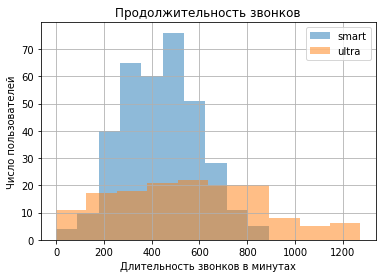

In [70]:
#Построим гистограммы для продолжительности звонков для обоих тарифов
for tariff in ['smart', 'ultra']:
    grouped_dfs_median_pivot_table.query('tariff == @tariff')['duration'].hist(bins=10, alpha=0.5)

plt.title('Продолжительность звонков')
plt.xlabel('Длительность звонков в минутах')
plt.ylabel('Число пользователей') 
plt.legend(['smart', 'ultra'])

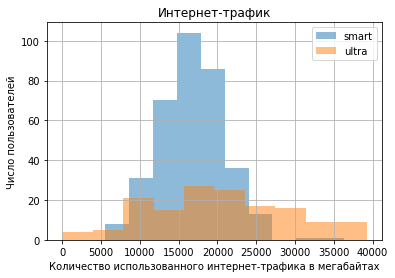

In [71]:
#Построим гистограммы для объёма использованного интернет-трафика для обоих тарифов
for tariff in ['smart', 'ultra']:
    grouped_dfs_median_pivot_table.query('tariff == @tariff')['mb_used'].hist(bins=10, alpha=0.5)

plt.title('Интернет-трафик')
plt.xlabel('Количество использованного интернет-трафика в мегабайтах')
plt.ylabel('Число пользователей') 
plt.legend(['smart', 'ultra'])

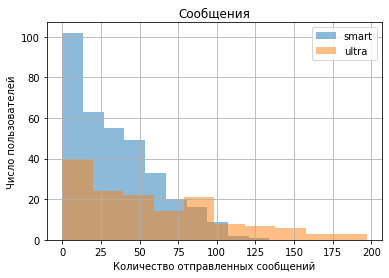

In [72]:
#Построим гистограммы для количества отправленных сообщений для обоих тарифов
for tariff in ['smart', 'ultra']:
    grouped_dfs_median_pivot_table.query('tariff == @tariff')['messages'].hist(bins=10, alpha=0.5)

plt.title('Сообщения')
plt.xlabel('Количество отправленных сообщений')
plt.ylabel('Число пользователей') 
plt.legend(['smart', 'ultra'])

### Вывод

Судя по полученным данным, дисперсия, стандартное отклонение и среднее количество гораздо больше у пользователей с тарифом "Ультра", чем у пользователей с тарифом "Смарт". Также поведения пользователей тарифа "Ультра" более разнообразно в сравнении с пользователями других тарифов, их хоть и меньше, поскольку они гораздо больше пользуются услугами, включёнными в их базовый набор (скорее всего это связано с тем, что им предоставляется больше свободных минут для разговора, больше количество отправленных сообщений и больший объём интернет-трафика, а пользователям тарифа "Смарт" приходится доплачивать дополнительные деньги за лишние минуты звонков, количество сообщений и интернет-трафик).

Сами гистограммы похожи на нормальное распределение (продолжительность звонков и объём интернет-трафика) и распределение Пуассона (количество отправленных сообщений).

## Проверка гипотез

### Гипотеза: Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

Для начала сформулируем 2 наши гипотезы:
- Нулевая гипотеза - средние выручки пользователей тарифов "Ультра" и "Смарт" равны;
- Альтернативная гипотеза - средняя выручки пользователей тарифов "Ультра" и "Смарт" различаются;

In [73]:
#Для начала сделаем выборку для каждого тарифа

tariff_smart = grouped_dfs.query('tariff == "smart"')['revenue']
tariff_ultra = grouped_dfs.query('tariff == "ultra"')['revenue']


In [74]:
#Возьмём уровень статистической значимости = 0.05
alpha = .05

In [75]:
#Проверим гипотезу о равенстве среднего 2 генеральных совокупностей с помощью t-теста
results = st.ttest_ind(
    tariff_smart, 
    tariff_ultra, 
    equal_var=False) #в данном случае непонятно, являются ли равными дисперсии выборок, скорее всего нет, поэтому возьмём 
                     #значение equal_var=False

In [76]:
#Проверим получившееся p-значение (вероятность получить наблюдаемый или еще более далекий от предполагаемого результат при 
#условии, что нулевая гипотеза верна) и проверим, верна ли наша нулевая гипотеза

print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 8.931402711366754e-296
Отвергаем нулевую гипотезу


In [77]:
#Посмотрим теперь средние значения выручек с каждого тарифа в среднем

grouped_dfs.pivot_table(index='tariff', values='revenue', aggfunc='median')

,revenue
tariff,
smart,959.898438
ultra,1950.000000


In [78]:
#Ещё раз посмотрим количество пользователей тарифом "Смарт" и "Ультра"
users['tariff'].value_counts()

smart    351
ultra    149
Name: tariff, dtype: int64

In [79]:
print('Выручка с пользователей тарифа "Смарт" в месяц:', 987 * 351)
print('Выручка с пользователей тарифа "Ультра" в месяц:', 1950 * 149)

Выручка с пользователей тарифа "Смарт" в месяц: 346437
Выручка с пользователей тарифа "Ультра" в месяц: 290550


### Вывод

Нулевая гипотеза была отвергнута, значит, доход от каждого тарифа различается. И ведь действительно, средние выручки между 2 тарифами различаются почти в 2 раза. Если посчитать, сколько в среднем переплачивают люди за тариф "Смарт", то получим: 987 - 550 = 437 рублей, а цена тарифа "Ультра" и так равна 1950 рублям. Значит, пользователям тарифа "Смарт" в большинстве случаем не хватает стандартного пакета, который включён в тариф, и они часто платят за дополнительные услуги (интернет, звонки, сообщения).

В среднем, выручка с пользователей тарифа "Смарт" больше, чем с пользователей тарифа "Ультра" в месяц (346437 и 290550). Связано это с большим числов клиентов первого тарифа.

### Гипотеза: Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Для начала сформулируем 2 наши гипотезы:

- Нулевая гипотеза - средние выручки пользователей из Москвы и из других регионов равны;
- Альтернативная гипотеза - средние выручки пользователей из Москвы и из других регионов различаются;

In [80]:
#Добавим в нашу таблицу столбец с городами
for user in grouped_dfs.index:
    grouped_dfs.loc[user, 'city'] = users.loc[user[0] - 1000, 'city']

In [81]:
#Сделаем выборку для Москвы и остальных городов
moscow_city = grouped_dfs.query('city == "Москва"')['revenue']
other_regions = grouped_dfs.query('city != "Москва"')['revenue']

In [82]:
#Возьмём уровень статистической значимости = 0.05
alpha = .05

In [83]:
#Проверим гипотезу о равенстве среднего 2 генеральных совокупностей с помощью t-теста
results = st.ttest_ind(
    moscow_city, 
    other_regions, 
    equal_var=False) #в данном случае непонятно, являются ли равными дисперсии выборок, скорее всего нет, поэтому возьмём 
                     #значение equal_var=False

In [84]:
#Проверим получившееся p-значение (вероятность получить наблюдаемый или еще более далекий от предполагаемого результат при 
#условии, что нулевая гипотеза верна) и проверим, верна ли наша нулевая гипотеза

print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.4549775646471024
Не получилось отвергнуть нулевую гипотезу


In [85]:
#Напишем функцию, которая выделит отдельно Москву и остальные регионы
def region(city):
    if city == 'Москва':
        return 'Москва'
    else:
        return 'Другой регион'

In [86]:
#Применим функцию
grouped_dfs['region'] = grouped_dfs['city'].apply(region)

In [87]:
#Посмотрим теперь средние выручки с Москвы и других регионов
grouped_dfs.pivot_table(index='region', values='revenue', aggfunc='median')

,revenue
region,
Другой регион,1518.078125
Москва,1704.632812


### Вывод

Нулевая гипотеза не была отвергнута (значит, средние выручки пользователей из Москвы и из других регионов равны). Действительно, средние выручки в Москве и других регионах не сильно отличаются друг от друга (примерно в 188 рублей). Если мы отклоняем гипотезу и принимаем, что средние выручки пользователей из Москвы и из других регионов различаются, то мы бы ошиблись с вероятностью 50.3%.

## Общий вывод

Был проведён анализ пользователей 2 тарифов. Выручка с пользователей тарифа "Смарт" больше, чем с пользователей тарифа "Ультра" в месяц (связано с большим числом клиентов первого тарифа). Были рассмотрены 2 гипотезы: средняя выручка пользователей тарифов «Ультра» и «Смарт» совпадают (не подтвердилась), средняя выручка пользователей из Москвы совпадает с выручкой пользователей из других регионов (подтвердилась). По большей части с данными уже было всё в порядке (исключения - тип данных в датах и пропуски в файле "users" в столбце "churn_date"), дубликатов не было. Дисперсия, стандартное отклонение и среднее количество гораздо больше у пользователей с тарифом "Ультра", чем у пользователей с тарифом "Смарт". Гистограммы похожи на нормальное распределение (продолжительность звонков и объём интернет-трафика) и распределение Пуассона (количество отправленных сообщений). Для более подробных выводов рекомендуется обращаться к оглавлению и рассматривать каждый пункт по отдельности.

- Дисперсия гораздо выше у пользователей тарифа "Ультра", поскольку их поведение более разнообразное по сравнению с пользователями тарифа "Смарт" (для этого достаточно посмотреть графики в пункте 4);
- Разница в количестве пользователей тарифов прослеживается в выручке (пользователей тарифа "Смарт" больше и с них выручка в месяц в среднем выше, чем с пользователей тарифа "Ультра"), в среднем значении, дисперсии и в стандартном отклонении (как уже писалось выше, поведение пользователей тарифа "Ультра" более разнообразное, поскольку у них базовый пакет услуг гораздо больше, чем у пользователей тарифа "Смарт", которым приходится доплачивать за дополнительные гигабайты, минуты звонка и сообщения;
- Тариф "Смарт" лучше и доступнее тарифа "Ультра", если человек не собирается пользоваться интернетом слишком много, поскольку цена за 1 Гб достаточно большая (200 рублей). Но, если же пользователь активно пользуется интернетом, много болтает по телефону и пишет сообщения, то ему возможно потребуется тариф "Ультра", поскольку там шире базовый пакет, и в среднем за него никто не переплачивал больше 1950 рублей, несмотря на то, что плата за дополнительные услуги меньше;